# Install pytorch

Install the LTS version:  

pip3 install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

In [1]:
!python --version

Python 3.9.12


In [2]:
!conda --version

conda 4.12.0


In [1]:
!nvidia-smi

Sun Nov  6 18:32:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.06       Driver Version: 522.06       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   64C    P0    34W /  N/A |      0MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# check pytorch with CUDA works

import torch
import torchvision

device = 'cuda'
boxes = torch.tensor([[0., 1., 2., 3.]]).to(device)
scores = torch.randn(1).to(device)
iou_thresholds = 0.5

print(torchvision.ops.nms(boxes, scores, iou_thresholds))

tensor([0], device='cuda:0')


<hr/><br/>

cmd, then cd to github\src\odn\torch_yolo, run (use pretrained model):

> python train.py --data data/coco128.yaml --cfg models/yolov5s.yaml --weights models/yolov5s.pt --batch-size 16

Using transfer learning, yolov5s can achieve about 0.9 mAP on coco128, 

         Epoch   gpu_mem       box       obj       cls    labels  img_size
         28/29     4.29G   0.03652   0.04224  0.008265       162       640: 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]
                     all        128        929      0.887       0.84      0.907      0.666

         Epoch   gpu_mem       box       obj       cls    labels  img_size
         29/29     4.29G    0.0354    0.0472  0.007321       288       640: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]
                     all        128        929      0.891      0.842      0.909      0.674

    30 epochs completed in 0.102 hours.
    Optimizer stripped from runs\train\exp4\weights\last.pt, 14.9MB
    Optimizer stripped from runs\train\exp4\weights\best.pt, 14.9MB

<br/>

# mAP: Mean Average Precision (平均精确度)

如何衡量一个模型的性能，单纯用 precision 和 recall 都不科学。把 PR曲线下的面积 当做衡量尺度, 就有了 AP值 这一概念。这里的 average，等于是对 precision 进行 取平均 。AP 实为 PR_AUC。

# Make a new fundus image set as yolo's test set

In [10]:
import os
from odn import utilitis
                
target = '../data/fundus/test'
source = 'C:/Users/eleve/Desktop/横向2022/TO 分区/注药'

utilitis.move_images_to_one_folder(source, target, copy = True)

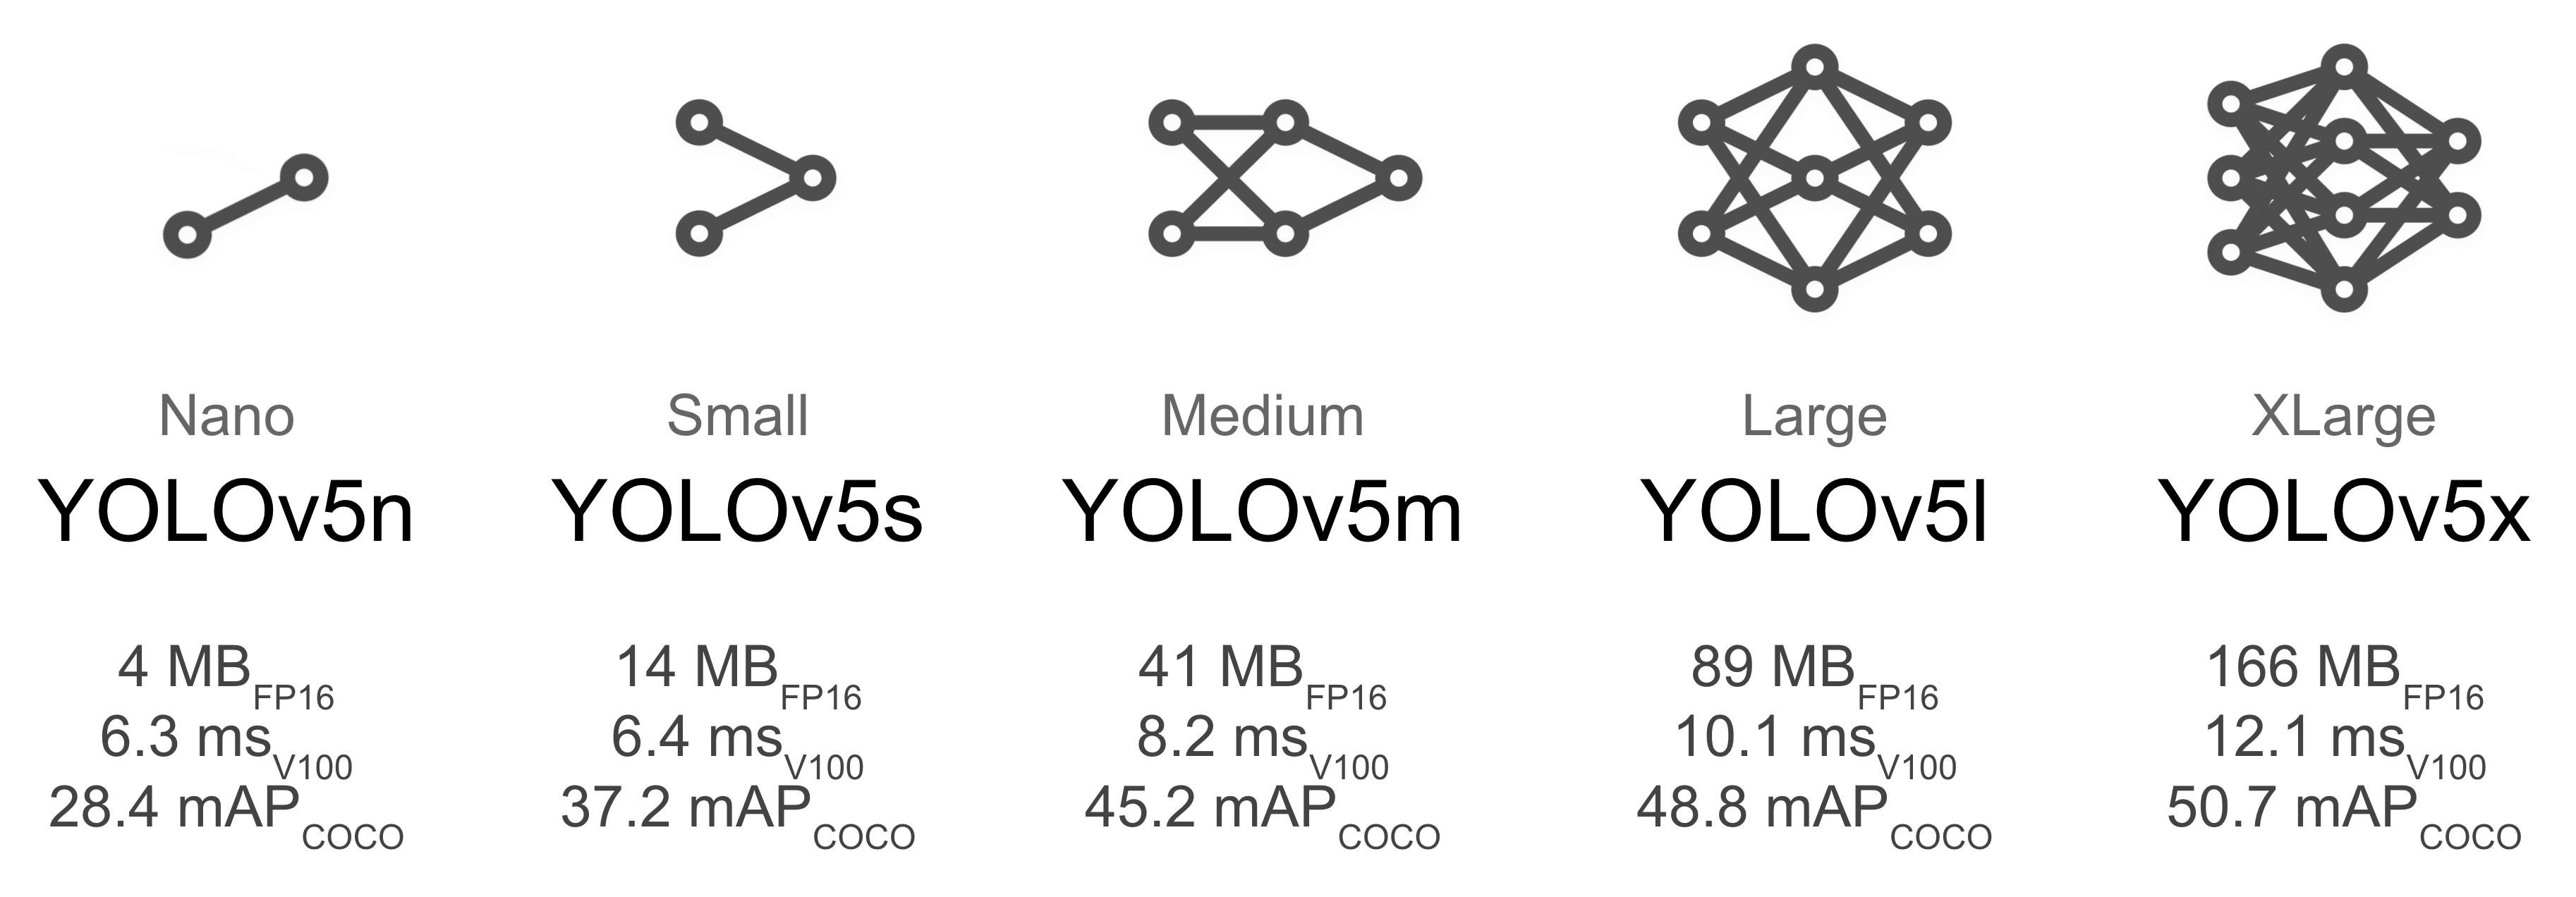

> cd C:\Users\eleve\Documents\codex\py\keras\8. Object Detection\github\src\odn\torch_yolo

> python train.py --data data/fundus.yaml --cfg models/yolov5s.yaml --weights models/yolov5s.pt --batch-size 16 --epochs 30

## Train yolov5s

         Epoch   gpu_mem       box       obj       cls    labels  img_size
         26/29     3.98G   0.03335   0.02485 0.0006545        15       640: 100%|██████████| 30/30 [00:34<00:00,  1.14s/it]
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 15/15 [00:09<00:00,  1.60it/s]
                     all        469        937      0.915       0.91      0.929      0.488

         Epoch   gpu_mem       box       obj       cls    labels  img_size
         27/29     3.98G   0.03264   0.02466 0.0009324        28       640: 100%|██████████| 30/30 [00:34<00:00,  1.14s/it]
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 15/15 [00:09<00:00,  1.59it/s]
                     all        469        937      0.933      0.931      0.942      0.511

         Epoch   gpu_mem       box       obj       cls    labels  img_size
         28/29     3.98G   0.03275    0.0252 0.0008076        19       640: 100%|██████████| 30/30 [00:34<00:00,  1.13s/it]
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 15/15 [00:09<00:00,  1.59it/s]
                     all        469        937      0.913      0.922      0.925      0.507

         Epoch   gpu_mem       box       obj       cls    labels  img_size
         29/29     3.98G   0.03285   0.02437 0.0009112        19       640: 100%|██████████| 30/30 [00:34<00:00,  1.14s/it]
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 15/15 [00:09<00:00,  1.58it/s]
                     all        469        937      0.937      0.932      0.938      0.505

    30 epochs completed in 0.379 hours.
    Optimizer stripped from runs\train\exp14\weights\last.pt, 14.4MB
    Optimizer stripped from runs\train\exp14\weights\best.pt, 14.4MB

    Validating runs\train\exp14\weights\best.pt...
    Fusing layers...
    YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 15/15 [00:11<00:00,  1.27it/s]
                     all        469        937      0.933      0.932      0.942      0.511
              optic disc        469        469      0.986      0.983      0.992      0.634
                  macula        469        468       0.88       0.88      0.893      0.388
    Results saved to runs\train\exp14

To continue training, 

> python train.py --data data/fundus.yaml --cfg models/yolov5s.yaml --weights runs/train/exp14/weights/best.pt --batch-size 16 --epochs 30 --img 640  

However, for the fundus dataset, 30 epochs is enough. 

## Train yolov5m

> python train.py --data data/fundus.yaml --cfg models/yolov5m.yaml --weights models/yolov5m.pt --batch-size 16 --epochs 30 --img 640

    YOLOv5m summary: 369 layers, 20875359 parameters, 20875359 gradients

    Starting training for 30 epochs...

     Epoch   gpu_mem       box       obj       cls    labels  img_size
      0/29     6.25G    0.1069    0.0392   0.02695        53       640:  80%|████████  | 24/30 [01:01<00:13,  2.24s/it]
      
yolov5m takes 6.25GB GPU memory at batchsize 16.

         Epoch   gpu_mem       box       obj       cls    labels  img_size
         27/29     6.52G   0.02973   0.02222 0.0008514        27       640: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 15/15 [00:15<00:00,  1.03s/it]
                     all        469        937      0.961      0.968       0.97      0.566

         Epoch   gpu_mem       box       obj       cls    labels  img_size
         28/29     6.52G   0.02941   0.02219 0.0006201        19       640: 100%|██████████| 30/30 [01:04<00:00,  2.17s/it]
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 15/15 [00:15<00:00,  1.02s/it]
                     all        469        937      0.971      0.963      0.976      0.584

         Epoch   gpu_mem       box       obj       cls    labels  img_size
         29/29     6.52G   0.03022   0.02179 0.0009094        20       640: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 15/15 [00:15<00:00,  1.02s/it]
                     all        469        937      0.976      0.979      0.984      0.599

    30 epochs completed in 0.685 hours.
    Optimizer stripped from runs\train\exp\weights\last.pt, 42.2MB
    Optimizer stripped from runs\train\exp\weights\best.pt, 42.2MB

    Validating runs\train\exp\weights\best.pt...
    Fusing layers...
    YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 15/15 [00:17<00:00,  1.18s/it]
                     all        469        937      0.976      0.979      0.984        0.6
              optic disc        469        469      0.986      0.989      0.993      0.667
                  macula        469        468      0.966      0.968      0.975      0.532
    Results saved to runs\train\exp


### The results are saved to /runs/train/exp...

# Validation

To use the trained model on a val set, 

> cd C:\Users\eleve\Documents\codex\py\keras\8. Object Detection\github\src\odn\torch_yolo  
> python val.py --weights runs/train/exp14/weights/best.pt --data data/fundus.yaml --img 640 --iou 0.65 --half

To use val.py, the data yaml must provide both images and labels. Here, we don't have another dataset, so we use the same yaml as training.

### The results are saved to /runs/val/exp...

# Load Model and Do Prediction - Using detect.py

In PyTorch, the learnable parameters (i.e. weights and biases) of an torch.nn.Module model are contained in the model’s parameters (accessed with model.parameters()). A state_dict is simply a Python dictionary object that maps each layer to its parameter tensor.

> python detect.py --source ../../../data/fundus/test --weights runs/train/exp14/weights/best.pt

### The results are saved to runs/detect/exp...

ALternatively, use the TorchScript format, you will be able to load the exported model and run inference without defining the model class.

Export:

    model_scripted = torch.jit.script(model) # Export to TorchScript
    model_scripted.save('model_scripted.pt') # Save

Load:

    model = torch.jit.load('model_scripted.pt')
    model.eval()

# Load Model and Do Prediction - Using torch_batch_object_detection()

In [ ]:
from odn.fundus import annotation

annotation.torch_batch_object_detection(model_path = '../src/odn/torch_yolo/runs/train/exp15/weights/best.pt',
    input_path = '../data/fundus/images',
    conf_thres=0.3, iou_thres=0.5, max_det=2, 
    anno_pil = True, colors = [(200,100,100),(55,125,125)], 
    suffix = '', output_path = '../data/fundus/yolo5/',
    display = True, verbose = False
    )

# In-place Prediction

In [ ]:
from odn import utils

FILES = utils.get_all_images_in_dir(folder = 'C:/Users/eleve/Desktop/横向2022/SZEH分区 第二次激光/激光  85个第二次/')

for f in FILES:
    if '_FRCNN' in f or '_SSD' in f:
        continue
    print(f) # save output to 'filelist.txt'

In [ ]:
from odn.fundus import annotation

annotation.torch_batch_object_detection(model_path = '../src/odn/torch_yolo/runs/train/exp15/weights/best.pt',
    input_path = '../src/odn/filelist.tmp.txt',
    conf_thres=0.3, iou_thres=0.5, max_det=2, 
    anno_pil = True, colors = [(200,100,100),(55,125,125)], 
    suffix = '_YOLO5', output_path = 'inplace',
    display = True, verbose = False)

# To sum up

We provide one function to include all the above steps,

    import odn
    odn.predict_folder('C:/Users/eleve/Desktop/横向2022/SZEH分区 第二次激光/激光  85个第二次', method = 'YOLO5', dir_output = 'inplace')

<hr/>

# 同批次分区 - Using torch_batch_object_detection_for_one_exam()

Add on 2020/11/06

Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients


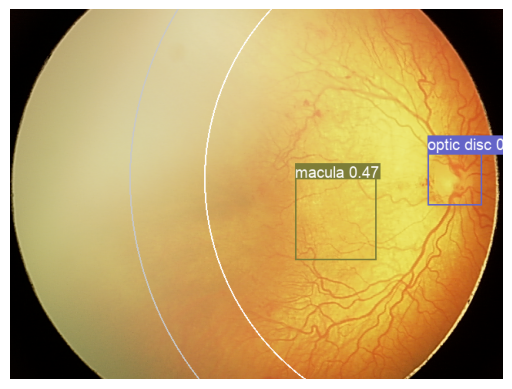

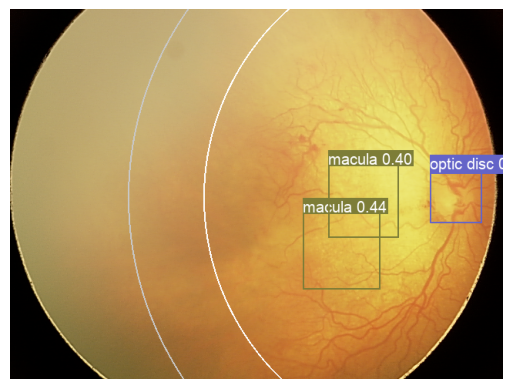

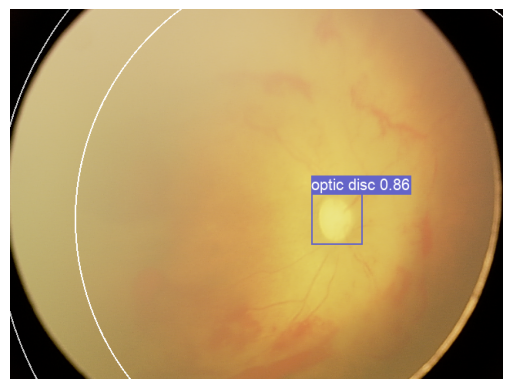

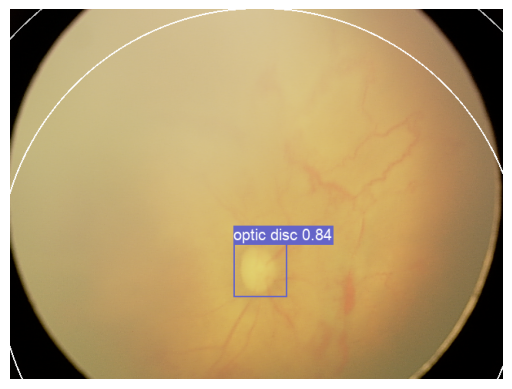

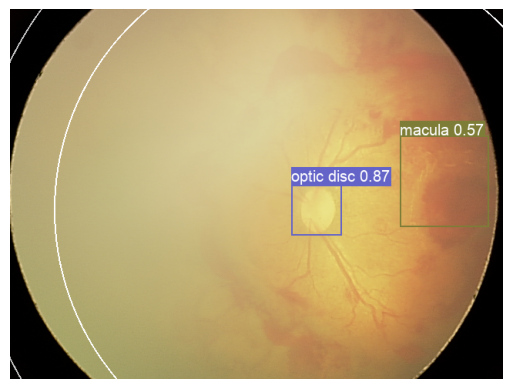

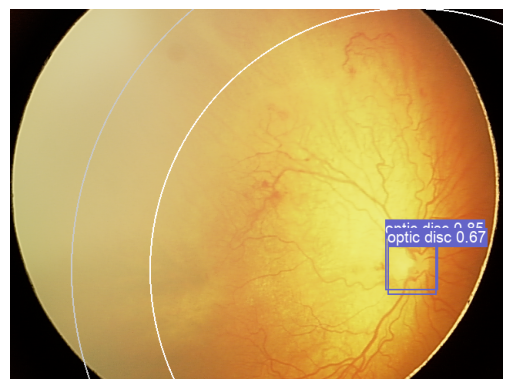

340

In [1]:
from odn.fundus import annotation

annotation.torch_batch_object_detection_for_one_exam(
    model_path = '../src/odn/torch_yolo/runs/train/exp15/weights/best.pt',
    input_path = '../data/fundus/one_exam', # or a 'filelist.txt' file
    conf_thres=0.3, iou_thres=0.5, max_det=2, 
    anno_pil = True, colors = [(200,100,100),(55,125,125)],
    suffix = '_YOLO5', display = True, verbose = False)

批量处理

In [3]:
import os
from odn.fundus import annotation

subdirs = [x[0] for x in os.walk(r'C:\Users\eleve\Desktop\横向2022\分区20221105')]

for subdir in subdirs:
    annotation.torch_batch_object_detection_for_one_exam(
    model_path = '../src/odn/torch_yolo/runs/train/exp15/weights/best.pt',
    input_path = subdir,
    conf_thres=0.3, iou_thres=0.5, max_det=2, 
    anno_pil = True, colors = [(200,100,100),(55,125,125)],
    suffix = '_YOLO5', display = False, verbose = False)

Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 pa

No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 


No images or videos found in {p}. 
Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')


YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
Fusing layers... 
Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients
